# **Projeto Acidentes em Rodovias Federais**

##### Notebook Destinado a limpeza de dados

In [565]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import statsmodels.api as sm


In [566]:
warnings.simplefilter(action='ignore', category=FutureWarning)

In [567]:
df20 = pd.read_csv("acidentes2020_todas_causas_tipos.csv", encoding='iso-8859-1', delimiter=";")
df21 = pd.read_csv("acidentes2021_todas_causas_tipos.csv", encoding='iso-8859-1', delimiter=";")
df22 = pd.read_csv("acidentes2022_todas_causas_tipos.csv", encoding='iso-8859-1', delimiter=';')
df23 = pd.read_csv("acidentes2023_todas_causas_tipos.csv", encoding='iso-8859-1', delimiter=";")
df = pd.concat([df20,df21, df22, df23], ignore_index=True)

In [568]:
print(df20.shape, end=' | ')
print(df21.shape, end=' | ')
print(df22.shape, end=' | ')
print(df23.shape, end=' | ')
print(df.shape)

(348047, 37) | (393521, 37) | (456521, 37) | (514799, 37) | (1712888, 37)


In [569]:
df.drop_duplicates(inplace=True)

In [570]:
df.head()

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_principal,...,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,regional,delegacia,uop
0,260031.0,578475.0,2020-01-01,quarta-feira,01:00:00,TO,153.0,"678,1",GURUPI,Sim,...,Feminino,0,0,1,0,"-11,77460203","-49,10744996",SPRF-TO,DEL02-TO,UOP02-DEL01-TO
1,260031.0,578475.0,2020-01-01,quarta-feira,01:00:00,TO,153.0,"678,1",GURUPI,Sim,...,Feminino,0,0,1,0,"-11,77460203","-49,10744996",SPRF-TO,DEL02-TO,UOP02-DEL01-TO
2,260031.0,578988.0,2020-01-01,quarta-feira,01:00:00,TO,153.0,"678,1",GURUPI,Sim,...,Masculino,0,0,1,0,"-11,77460203","-49,10744996",SPRF-TO,DEL02-TO,UOP02-DEL01-TO
3,260031.0,578988.0,2020-01-01,quarta-feira,01:00:00,TO,153.0,"678,1",GURUPI,Sim,...,Masculino,0,0,1,0,"-11,77460203","-49,10744996",SPRF-TO,DEL02-TO,UOP02-DEL01-TO
4,260031.0,578987.0,2020-01-01,quarta-feira,01:00:00,TO,153.0,"678,1",GURUPI,Sim,...,Masculino,0,0,1,0,"-11,77460203","-49,10744996",SPRF-TO,DEL02-TO,UOP02-DEL01-TO


In [571]:
df.columns

Index(['id', 'pesid', 'data_inversa', 'dia_semana', 'horario', 'uf', 'br',
       'km', 'municipio', 'causa_principal', 'causa_acidente',
       'ordem_tipo_acidente', 'tipo_acidente', 'classificacao_acidente',
       'fase_dia', 'sentido_via', 'condicao_metereologica', 'tipo_pista',
       'tracado_via', 'uso_solo', 'id_veiculo', 'tipo_veiculo', 'marca',
       'ano_fabricacao_veiculo', 'tipo_envolvido', 'estado_fisico', 'idade',
       'sexo', 'ilesos', 'feridos_leves', 'feridos_graves', 'mortos',
       'latitude', 'longitude', 'regional', 'delegacia', 'uop'],
      dtype='object')

In [572]:
df.loc[0][0:15]

id                                       260031.0
pesid                                    578475.0
data_inversa                           2020-01-01
dia_semana                           quarta-feira
horario                                  01:00:00
uf                                             TO
br                                          153.0
km                                          678,1
municipio                                  GURUPI
causa_principal                               Sim
causa_acidente                   Animais na Pista
ordem_tipo_acidente                             1
tipo_acidente             Atropelamento de Animal
classificacao_acidente        Com Vítimas Feridas
fase_dia                              Plena Noite
Name: 0, dtype: object

In [573]:
df.loc[0][15:]

sentido_via                              Crescente
condicao_metereologica                     Nublado
tipo_pista                                 Simples
tracado_via                                   Reta
uso_solo                                       Não
id_veiculo                                  464101
tipo_veiculo                             Automóvel
marca                     FIAT/SIENA ATTRACTIV 1.4
ano_fabricacao_veiculo                      2012.0
tipo_envolvido                            Condutor
estado_fisico                        Lesões Graves
idade                                         33.0
sexo                                      Feminino
ilesos                                           0
feridos_leves                                    0
feridos_graves                                   1
mortos                                           0
latitude                              -11,77460203
longitude                             -49,10744996
regional                       

Diversos erros nos dados podem ser encontrados, como formatação e colunas desnecessárias

#### **Excluindo colunas desnecessarias**

In [574]:
df.drop(['pesid', 'id_veiculo', 'marca', 'regional', 'uop', 'causa_principal'], axis=1, inplace=True)

In [575]:
print(df.shape)

(1712888, 31)


**Verificando se há valores nulos**

In [576]:
valores_vazios = df.isna().sum()
valores_vazios[valores_vazios > 0]

br                          5781
km                          5781
tipo_acidente                  1
ano_fabricacao_veiculo     94377
idade                     170294
delegacia                    813
dtype: int64

### **Tratando valores vazios**

Tipo Acidente

In [577]:
df['tipo_acidente'].value_counts()

tipo_acidente
Colisão traseira                   257322
Saída de leito carroçável          228765
Tombamento                         211941
Queda de ocupante de veículo       194487
Colisão transversal                139970
Colisão frontal                    120755
Colisão com objeto                 116167
Capotamento                        101757
Colisão lateral mesmo sentido       91558
Atropelamento de Pedestre           54696
Engavetamento                       42680
Colisão lateral sentido oposto      36557
Colisão lateral                     36178
Colisão com objeto estático         30527
Derramamento de carga               15616
Incêndio                            15027
Atropelamento de Animal             11427
Eventos atípicos                     4772
Colisão com objeto em movimento      1504
Danos eventuais                      1181
Name: count, dtype: int64

In [578]:
#Atribuindo a moda para o valor faltante
df.fillna({
    'tipo_acidente' : 'Colisão traseira'
}, inplace=True)

Coluna idade

In [579]:
# Dados da coluna idade(arredondando para não ficar em notação científica)
round(df['idade'].describe(), 2)

count    1542594.00
mean          39.15
std           38.66
min            0.00
25%           27.00
50%           37.00
75%           48.00
max         2022.00
Name: idade, dtype: float64

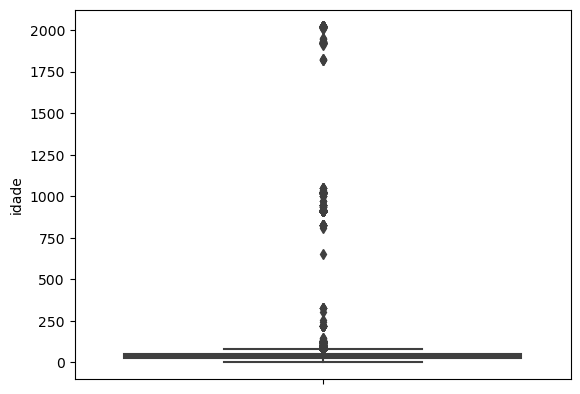

In [580]:
sns.boxplot(y='idade', data=df, orient="v")
plt.show()

Tratando os outliers da coluna idade

In [581]:
#Quantidade de valores acima de 100 anos
df.loc[df['idade'] > 100, 'idade'].shape[0]

1535

In [582]:
# Atribuindo o valor 37 (mediana), para as idades maiores que 100 anos
df.loc[df['idade'] > 100, 'idade'] = 37

In [583]:
# Verificando as mudanças
round(df['idade'].describe(), 2)

count    1542594.00
mean          38.20
std           15.13
min            0.00
25%           27.00
50%           37.00
75%           48.00
max          100.00
Name: idade, dtype: float64

In [584]:
# Acredito que o valor 0 possa representar recém-nascidos e crianças abaixo de 1 ano de idade
# Não necessariamente sendo valores incorretos
df.loc[df['idade'] == 0, 'idade'].count()

3092

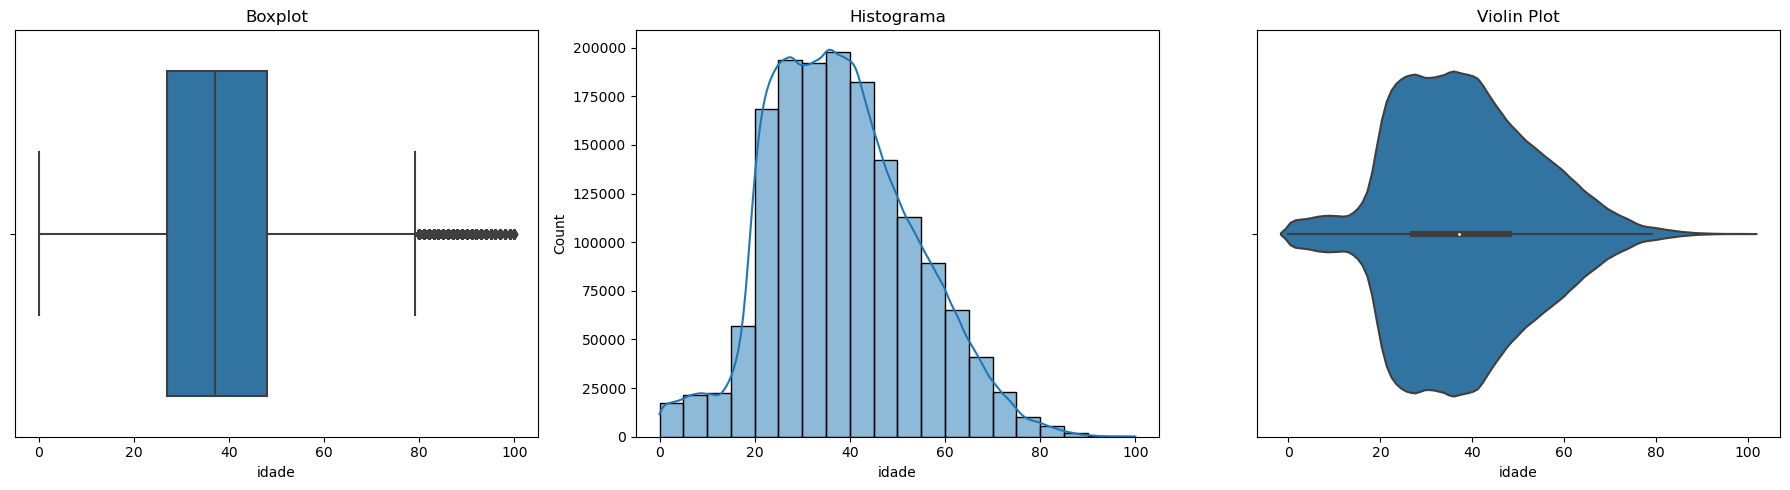

In [585]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Boxplot
sns.boxplot(data=df, x='idade', ax=axs[0])
axs[0].set_title('Boxplot')

# Histograma
sns.histplot(data=df, x='idade', bins=20, kde=True, ax=axs[1])
axs[1].set_title('Histograma')

# Gráfico de Violino
sns.violinplot(data=df, x='idade', ax=axs[2])
axs[2].set_title('Violin Plot')

# Ajustar layout
plt.tight_layout()
plt.show()

In [586]:
# Preenchendo os valores ausentes na coluna 'idade' com uma amostra gerada aleatoriamente,
# distribuída normalmente com base na média e no desvio padrão da coluna 'idade' existente

media_idade = df['idade'].mean()
desvio_padrao_idade = df['idade'].std()

valores_aleatorios = np.random.normal(media_idade, desvio_padrao_idade, df['idade'].isnull().sum()).astype(int)
while (valores_aleatorios <= 0).any():
    valores_aleatorios[valores_aleatorios <= 0] = np.random.normal(media_idade, desvio_padrao_idade, (valores_aleatorios <= 0).sum()).astype(int)

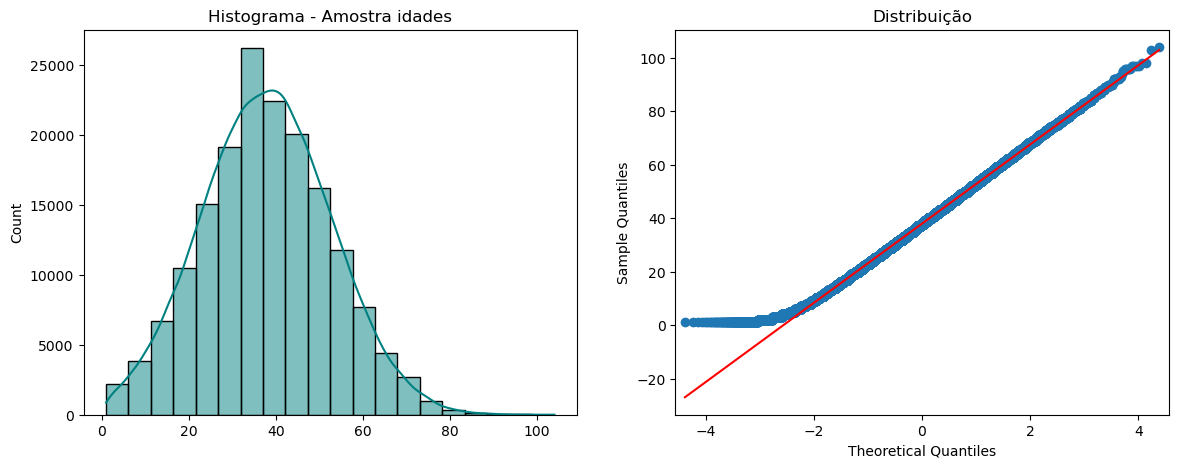

In [587]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(valores_aleatorios, bins=20, kde=True, color='teal', ax=axs[0])
axs[0].set_title("Histograma - Amostra idades")


sm.qqplot(valores_aleatorios, line ='q', ax=axs[1])
axs[1].set_title("Distribuição")

plt.show()

In [588]:
df.loc[df['idade'].isnull(), 'idade'] = valores_aleatorios

In [589]:
# Transformando o tipo de dado da coluna idade em número inteiro
df['idade'] = df['idade'].astype(int)

**Coluna BR**

In [590]:
df['br'].value_counts()

br
116.0    247596
101.0    222187
40.0      85861
381.0     81705
163.0     71025
          ...  
265.0        14
437.0        10
342.0         4
475.0         2
477.0         2
Name: count, Length: 122, dtype: int64

In [591]:
# Verificando os valores onde a 'br' está vazia
df.loc[df['br'].isna(), ['br', 'municipio']]

,br,municipio
559,NaN,SABARA
4491,NaN,RIO DE JANEIRO
4492,NaN,RIO DE JANEIRO
4493,NaN,RIO DE JANEIRO
6402,NaN,SANTO ANTONIO DO LEVERGER
...,...,...
1708538,NaN,ELDORADO DO SUL
1708539,NaN,ELDORADO DO SUL
1708540,NaN,ELDORADO DO SUL
1708541,NaN,ELDORADO DO SUL


In [592]:
# Criando uma função moda para encontrar a moda da 'br' com base no municipio
# Essa função é necessaria pois há valores nulos na coluna

def moda(coluna):
    moda = coluna.mode()
    if len(moda) > 0:
        return moda.iloc[0]
    else:
        return None

In [593]:
# Escolhendo as colunas e aplicando a função

moda_br_municipio = df.groupby('municipio')['br'].agg(moda)
moda_br_municipio

municipio
ABADIA DE GOIAS     60.0
ABADIANIA           60.0
ABARE              116.0
ABEL FIGUEIREDO    222.0
ABRE CAMPO         262.0
                   ...  
XAPURI             317.0
XAXIM              282.0
XEXEU              101.0
XINGUARA           155.0
ZE DOCA            316.0
Name: br, Length: 1985, dtype: float64

In [594]:
# Aplicando a função

df['br'] = df.apply(lambda row: moda_br_municipio[row['municipio']] if pd.isna(row['br']) else row['br'], axis=1)

In [595]:
df.loc[df['br'].isna(), 'municipio'].unique()

array(['GALIA', 'SAO JOAO DO PIAUI', 'AGUA AZUL DO NORTE', 'PEROLA',
       'PALOTINA', 'SANTA CRUZ DO RIO PARDO', 'CAPIVARI DO SUL',
       'RUBINEIA', 'LAVRAS DO SUL', 'BODOQUENA', 'ALMEIRIM', 'URUPES',
       'CORONEL FREITAS', 'BOCA DA MATA', 'TERESINA DE GOIAS', 'TUCUMA',
       'ARAPIRACA', 'FRANCO DA ROCHA', 'GARRAFAO DO NORTE', 'FARROUPILHA',
       'AMETISTA DO SUL', 'TRAMANDAI', 'PORTO NACIONAL',
       'SAO FELIX DO XINGU'], dtype=object)

ainda sobram valores faltantes, utilizarei a coluna 'uf' como base agora

In [596]:
moda_br_uf = df.groupby('uf')['br'].agg(moda)

In [597]:
df['br'] = df.apply(lambda row: moda_br_uf[row['uf']] if pd.isna(row['br']) else row['br'], axis=1)

In [598]:
df['br'].isna().sum()

0

In [599]:
df['br'] = df['br'].astype(int)

**Coluna KM**

In [600]:
df['km'].value_counts()

km
2        6249
1        6173
3        6110
5        5698
4        4803
         ... 
942,9       1
642,2       1
698,3       1
769,1       1
868,2       1
Name: count, Length: 9352, dtype: int64

In [601]:
# Retirando o ponto flutuante da coluna 'km'

df['km'] = df['km'].str.split(',').str[0]

In [602]:
quantidade_km_nan = df['km'].isna().sum()
quantidade_km_nan

5781

In [603]:
df['km'] = df['km'].fillna(-1).astype(int)
df['km'] = df['km'].astype(int)

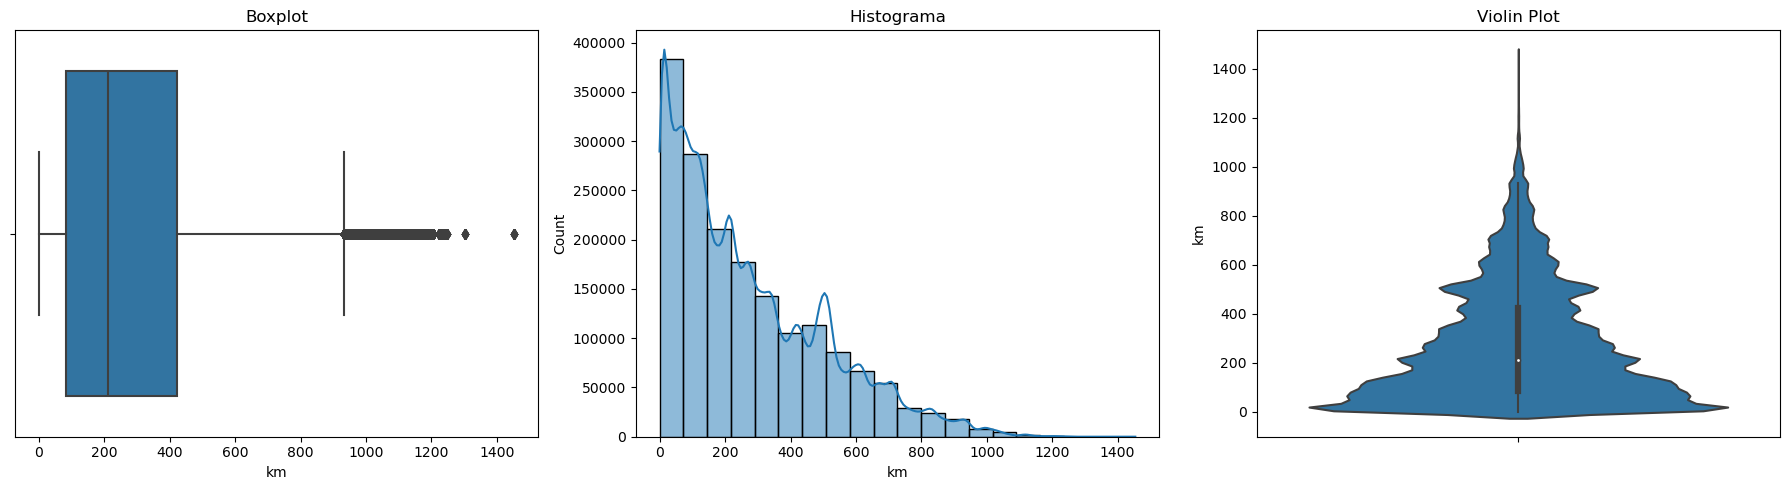

In [604]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

sns.boxplot(data=df, x='km', ax=axs[0])
axs[0].set_title('Boxplot')

sns.histplot(data=df, x='km', bins=20, kde=True, ax=axs[1])
axs[1].set_title('Histograma')

sns.violinplot(data=df, y='km', ax=axs[2], orient='v')
axs[2].set_title('Violin Plot')

plt.tight_layout()
plt.show()

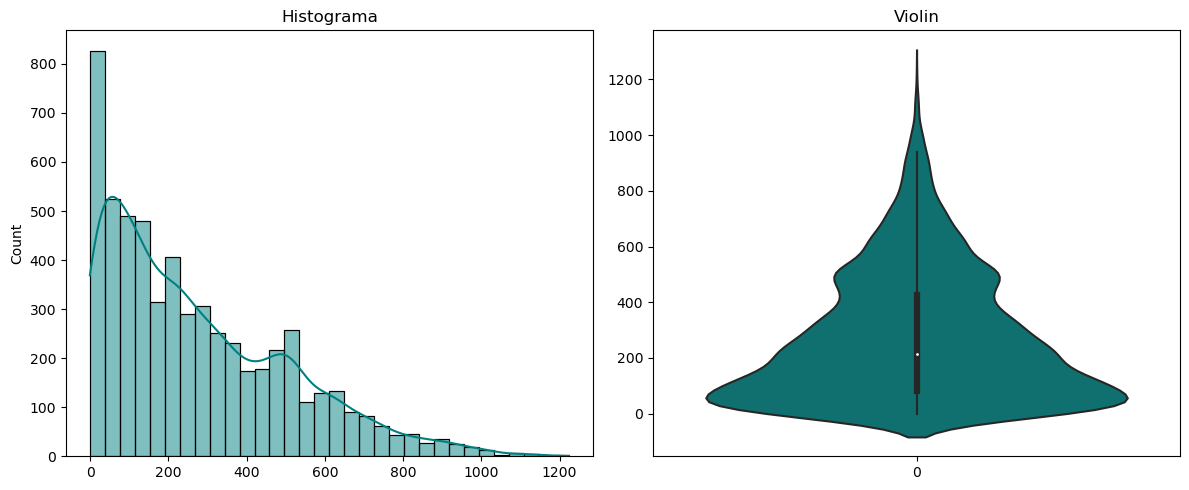

In [605]:
# Gerando uma amostra com base nos próprios dados da coluna km

amostra_km = np.random.choice(df['km'], size= quantidade_km_nan, replace=True)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(amostra_km, kde=True, color='teal', ax=axs[0])
axs[0].set_title('Histograma')

sns.violinplot(amostra_km, color='teal', ax=axs[1])
axs[1].set_title("Violin")

plt.tight_layout()
plt.show()

In [606]:
df.loc[df['km'] == -1, 'km'] = amostra_km

Ano de Fabricação

In [607]:
round(df['ano_fabricacao_veiculo'].describe(), 2)

count    1618511.00
mean        1923.22
std          411.81
min            0.00
25%         2007.00
50%         2012.00
75%         2017.00
max         2023.00
Name: ano_fabricacao_veiculo, dtype: float64

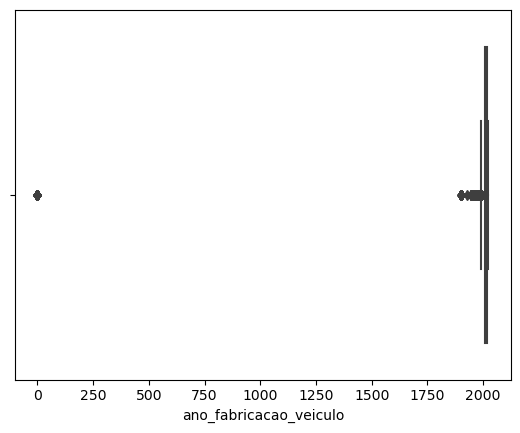

In [608]:
sns.boxplot(data=df, x='ano_fabricacao_veiculo')
plt.show()

Há presença de valores nulos, vazios e menores que 1900

In [609]:
df.loc[df['ano_fabricacao_veiculo'] <= 1950, 'ano_fabricacao_veiculo'].value_counts()

ano_fabricacao_veiculo
0.0       70931
1900.0      139
1946.0        8
1929.0        1
Name: count, dtype: int64

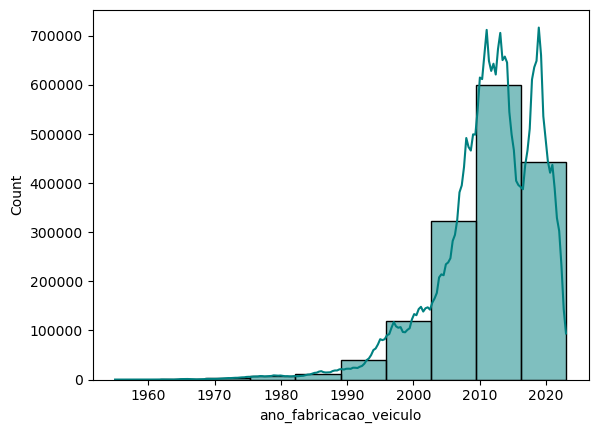

In [610]:
sns.histplot(data=df.loc[df['ano_fabricacao_veiculo'] >= 1950], x='ano_fabricacao_veiculo', bins=10, kde=True, color='teal')
plt.show()

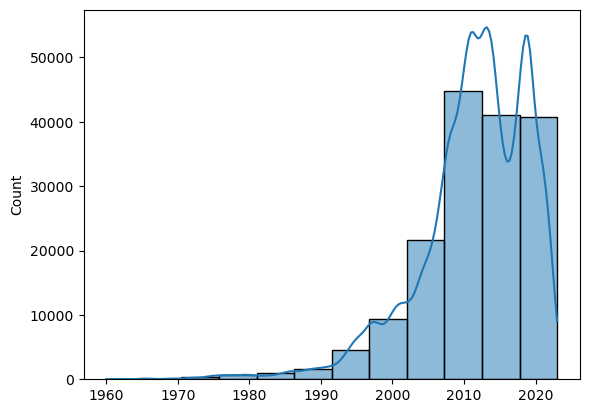

In [611]:
# Gerando uma amostra para a coluna ano_fabricacao_veiculo para os valores nulos e vazios

quantidade_fab0 = df.loc[df['ano_fabricacao_veiculo'] <= 1950].shape[0] + df['ano_fabricacao_veiculo'].isnull().sum()

df_filtrofab0 = df.loc[df['ano_fabricacao_veiculo'] > 1950, 'ano_fabricacao_veiculo']

amostra_fab = np.random.choice(df_filtrofab0, size=quantidade_fab0, replace=True)
sns.histplot(amostra_fab, bins=12, kde=True)
plt.show()

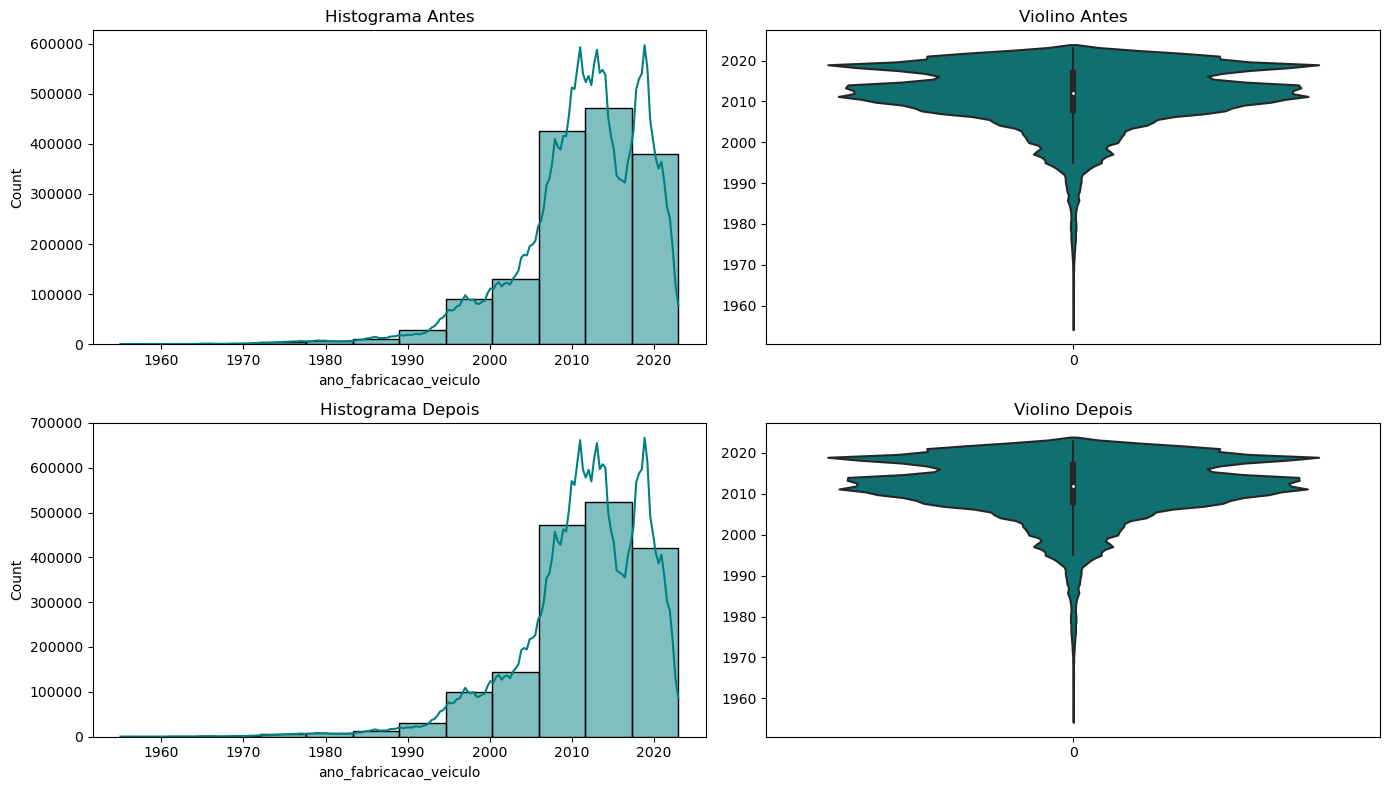

In [612]:
fig, axs = plt.subplots(2, 2, figsize=(14, 8))

sns.histplot(df_filtrofab0, ax=axs[0, 0], bins=12, color='teal', kde=True)
axs[0, 0].set_title('Histograma Antes')

sns.violinplot(df_filtrofab0, ax=axs[0, 1], color='teal')
axs[0, 1].set_title('Violino Antes')

# Substituindo os dados inconsistentes pela amostra gerada
df.loc[(df['ano_fabricacao_veiculo'].isna()) | (df['ano_fabricacao_veiculo'] <= 1950), 'ano_fabricacao_veiculo'] = amostra_fab

anofab = df['ano_fabricacao_veiculo']

sns.histplot(anofab, ax=axs[1, 0], bins=12, color='teal', kde=True)
axs[1, 0].set_title('Histograma Depois')

sns.violinplot(anofab, ax=axs[1, 1], color='teal')
axs[1, 1].set_title('Violino Depois')

plt.tight_layout()
plt.show()

In [613]:
df['ano_fabricacao_veiculo'] = df['ano_fabricacao_veiculo'].astype(int)

Delegacia

In [614]:
df['delegacia'].value_counts()

delegacia
DEL01-PR    72972
DEL01-MG    45984
DEL01-SC    35572
DEL04-SC    35195
DEL01-SP    30891
            ...  
DEL07-SP     2141
DEL12-RS     2026
DEL02-PI     1708
SEOP-RR        67
SEOP-AP        54
Name: count, Length: 153, dtype: int64

In [615]:
moda_delagacia_municipio = df.groupby('municipio')['delegacia'].agg(moda)
moda_delagacia_uf = df.groupby('uf')['delegacia'].agg(moda)

In [616]:
df['delegacia'] = df.apply(lambda row: moda_delagacia_municipio[row['municipio']] if pd.isna(row['delegacia']) else row['delegacia'], axis=1)
df['delegacia'] = df.apply(lambda row: moda_delagacia_uf[row['uf']] if pd.isna(row['delegacia']) else row['delegacia'], axis=1)

Foi observado anteriormente tipos de dados incorretos

In [617]:
df.dtypes[:20]

id                        float64
data_inversa               object
dia_semana                 object
horario                    object
uf                         object
br                          int32
km                          int32
municipio                  object
causa_acidente             object
ordem_tipo_acidente         int64
tipo_acidente              object
classificacao_acidente     object
fase_dia                   object
sentido_via                object
condicao_metereologica     object
tipo_pista                 object
tracado_via                object
uso_solo                   object
tipo_veiculo               object
ano_fabricacao_veiculo      int32
dtype: object

In [618]:
df.dtypes[20:]

tipo_envolvido    object
estado_fisico     object
idade              int32
sexo              object
ilesos             int64
feridos_leves      int64
feridos_graves     int64
mortos             int64
latitude          object
longitude         object
delegacia         object
dtype: object

O tipo object significa que pode haver dois ou mais tipos de dados misturados

***Formatando os tipos de dados***

**Coluna id**

In [619]:
df['id'].value_counts()

id
368980.0    2100
513470.0    1512
508740.0     990
404997.0     980
543737.0     900
            ... 
510016.0       1
280674.0       1
510018.0       1
510021.0       1
475115.0       1
Name: count, Length: 260480, dtype: int64

In [620]:
ids_mais_de_100 = df['id'].value_counts()[df['id'].value_counts() > 100].index
df[df['id'].isin(ids_mais_de_100)][:15]

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,ordem_tipo_acidente,...,estado_fisico,idade,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,delegacia
1576,260421.0,2020-01-02,quinta-feira,19:00:00,MG,381,484,BETIM,Defeito na Via,1,...,Lesões Leves,41,Masculino,0,1,0,0,"-19,95624622","-44,09843445",DEL01-MG
1577,260421.0,2020-01-02,quinta-feira,19:00:00,MG,381,484,BETIM,Defeito na Via,1,...,Lesões Leves,22,Masculino,0,1,0,0,"-19,95624622","-44,09843445",DEL01-MG
1578,260421.0,2020-01-02,quinta-feira,19:00:00,MG,381,484,BETIM,Defeito na Via,1,...,Lesões Leves,43,Feminino,0,1,0,0,"-19,95624622","-44,09843445",DEL01-MG
1579,260421.0,2020-01-02,quinta-feira,19:00:00,MG,381,484,BETIM,Defeito na Via,1,...,Lesões Leves,27,Feminino,0,1,0,0,"-19,95624622","-44,09843445",DEL01-MG
1580,260421.0,2020-01-02,quinta-feira,19:00:00,MG,381,484,BETIM,Defeito na Via,1,...,Lesões Leves,32,Feminino,0,1,0,0,"-19,95624622","-44,09843445",DEL01-MG
1581,260421.0,2020-01-02,quinta-feira,19:00:00,MG,381,484,BETIM,Defeito na Via,1,...,Lesões Leves,24,Feminino,0,1,0,0,"-19,95624622","-44,09843445",DEL01-MG
1582,260421.0,2020-01-02,quinta-feira,19:00:00,MG,381,484,BETIM,Defeito na Via,1,...,Lesões Leves,22,Masculino,0,1,0,0,"-19,95624622","-44,09843445",DEL01-MG
1583,260421.0,2020-01-02,quinta-feira,19:00:00,MG,381,484,BETIM,Defeito na Via,1,...,Ileso,32,Masculino,1,0,0,0,"-19,95624622","-44,09843445",DEL01-MG
1584,260421.0,2020-01-02,quinta-feira,19:00:00,MG,381,484,BETIM,Defeito na Via,1,...,Lesões Leves,63,Feminino,0,1,0,0,"-19,95624622","-44,09843445",DEL01-MG
1585,260421.0,2020-01-02,quinta-feira,19:00:00,MG,381,484,BETIM,Defeito na Via,1,...,Lesões Leves,37,Feminino,0,1,0,0,"-19,95624622","-44,09843445",DEL01-MG


In [621]:
# Transformando o id em string e retirando o ponto flutuante

df['id'] = df['id'].astype(str)
df['id'] = df['id'].str.replace('.0', '')

# Anteriormente foi possivel observar id se repetindo mais de 100x
# o que não faz sentido, visto que é muito dificil um acidente afetar 200 pessoas diretamente

# Utilizarei os parâmetros idade, id e sexo para remover duplicações nos dados, como a distribuição das idades é proximo de uma normal
# a probabilidade de  um pessoas da mesma idade estiverem envolvidas

df = df.drop_duplicates(subset=['id', 'idade', 'sexo'])

In [622]:
# Verificando as alterações
df['id'].value_counts()

id
508740    130
568579    126
404997    117
493258    114
358412    114
         ... 
368248      1
368251      1
496352      1
368255      1
291908      1
Name: count, Length: 260480, dtype: int64

**Coluna data_inversa**

In [623]:
df['data_inversa'].value_counts()

data_inversa
2023-12-23    1067
2023-06-11     960
2023-07-23     945
2020-10-10     885
2023-12-15     871
              ... 
2020-03-28     209
2020-03-30     199
2020-03-25     182
2020-03-26     177
2020-03-23     172
Name: count, Length: 1461, dtype: int64

In [624]:
# Transformando em date_time
df['data_inversa'] = pd.to_datetime(df['data_inversa'])

In [625]:
df['horario'] = pd.to_datetime(df['horario'], format='%H:%M:%S')

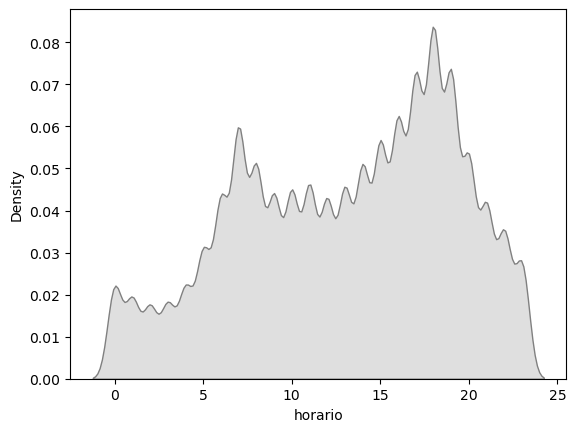

In [626]:
# Visualizando a distribuição dos valores pelas horas

sns.kdeplot(df['horario'].dt.hour, fill=True, color='gray')
plt.show()

In [627]:
# Observando o formato dos dados
df['horario'].value_counts()

horario
1900-01-01 19:00:00    10461
1900-01-01 18:30:00     9979
1900-01-01 18:00:00     9879
1900-01-01 17:00:00     8493
1900-01-01 17:30:00     8256
                       ...  
1900-01-01 02:32:00        3
1900-01-01 02:36:00        3
1900-01-01 01:54:00        2
1900-01-01 01:17:00        1
1900-01-01 01:19:00        1
Name: count, Length: 1438, dtype: int64

In [628]:
# Criando a coluna data_completa para juntar o horario e a data

df['data_completa'] = df['data_inversa'] + pd.to_timedelta(df['horario'].dt.strftime('%H:%M:%S'))
df['data_completa'].value_counts()

data_completa
2023-03-05 12:35:00    130
2023-12-17 18:15:00    126
2021-12-31 04:00:00    121
2021-11-19 15:20:00    115
2021-05-17 22:10:00    114
                      ... 
2023-06-10 07:50:00      1
2020-04-08 10:35:00      1
2021-05-31 13:40:00      1
2022-03-18 14:20:00      1
2022-01-17 05:05:00      1
Name: count, Length: 176821, dtype: int64

In [629]:
# Excluindo data_inversa e horario para ficar apenas a coluna com a data completa

df.drop(['data_inversa', 'horario'], axis=1, inplace=True)

**Coluna uf**

In [630]:
df['uf'].value_counts()

uf
MG    90810
PR    77519
SC    74530
RS    50549
RJ    47282
SP    47033
BA    39318
GO    35371
PE    30100
ES    23500
MT    23145
MS    18797
RO    17194
PB    17056
CE    16083
MA    14055
PI    13842
PA    13704
RN    13325
DF    10577
TO     7164
AL     5967
SE     5657
AC     2759
RR     2696
AP     2017
AM     1758
Name: count, dtype: int64

In [631]:
# Nenhuma anormalidade nos dados da coluna uf

df['uf'] = df['uf'].astype(str)

In [632]:
df['dia_semana'].value_counts()

dia_semana
domingo          123260
sábado           119790
sexta-feira      109014
segunda-feira     93414
quinta-feira      88208
quarta-feira      85377
terça-feira       82745
Name: count, dtype: int64

In [633]:
df['dia_semana'] = df['dia_semana'].astype(str)

**Coluna BR**

In [634]:
# Convertendo para string

df['br'] = 'BR-' + df['br'].astype(int).astype(str)

In [635]:
df['br'].unique()

array(['BR-153', 'BR-116', 'BR-101', 'BR-364', 'BR-319', 'BR-369',
       'BR-104', 'BR-290', 'BR-470', 'BR-282', 'BR-156', 'BR-60', 'BR-20',
       'BR-324', 'BR-373', 'BR-407', 'BR-381', 'BR-316', 'BR-262',
       'BR-40', 'BR-376', 'BR-392', 'BR-163', 'BR-459', 'BR-277',
       'BR-308', 'BR-10', 'BR-230', 'BR-222', 'BR-232', 'BR-50', 'BR-356',
       'BR-70', 'BR-493', 'BR-393', 'BR-365', 'BR-280', 'BR-408',
       'BR-135', 'BR-343', 'BR-158', 'BR-467', 'BR-361', 'BR-80',
       'BR-414', 'BR-447', 'BR-242', 'BR-304', 'BR-259', 'BR-251',
       'BR-110', 'BR-386', 'BR-210', 'BR-367', 'BR-146', 'BR-235',
       'BR-487', 'BR-293', 'BR-174', 'BR-405', 'BR-465', 'BR-476',
       'BR-226', 'BR-452', 'BR-330', 'BR-428', 'BR-482', 'BR-420',
       'BR-472', 'BR-480', 'BR-401', 'BR-354', 'BR-469', 'BR-406',
       'BR-423', 'BR-285', 'BR-424', 'BR-267', 'BR-427', 'BR-412',
       'BR-471', 'BR-463', 'BR-429', 'BR-287', 'BR-272', 'BR-155',
       'BR-485', 'BR-415', 'BR-448', 'BR-418', 'B

**Coluna municipio**

In [636]:
df['municipio'].value_counts()

municipio
BRASILIA            10577
CURITIBA             9116
GUARULHOS            7998
SAO JOSE             6522
DUQUE DE CAXIAS      6089
                    ...  
FRANCO DA ROCHA         1
MACAMBARA               1
URANDI                  1
SERRA DO RAMALHO        1
DARIO MEIRA             1
Name: count, Length: 1985, dtype: int64

**Coluna Causa_acidente**

In [637]:
df['causa_acidente'].value_counts()

causa_acidente
Reação tardia ou ineficiente do condutor                                         67781
Velocidade Incompatível                                                          62604
Ausência de reação do condutor                                                   56507
Falta de Atenção à Condução                                                      56085
Acessar a via sem observar a presença dos outros veículos                        44541
                                                                                 ...  
Transitar na calçada                                                                75
Semáforo com defeito                                                                62
Obstrução Via tentativa Assalto                                                     38
Condutor não acionou o farol baixo durante o dia em rodovias de pista simples       35
Pedestre - Ingestão de álcool/ substâncias psicoativas                              16
Name: count, Length: 92, dty

**Ordem Tipo Acidente**

In [638]:
# Posteriormente irei agrupar e sumarizar os dados com base no id e deletar essa coluna

df['ordem_tipo_acidente'].describe()

count    701808.000000
mean          1.410558
std           0.735149
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max          15.000000
Name: ordem_tipo_acidente, dtype: float64

**Coluna Classificação Acidente**

In [639]:
df['classificacao_acidente'].value_counts()

classificacao_acidente
Com Vítimas Feridas    522622
Sem Vítimas            102599
Com Vítimas Fatais      76587
Name: count, dtype: int64

**Coluna Fase Dia**

In [640]:
df['fase_dia'].value_counts()

fase_dia
Pleno dia      378677
Plena Noite    249119
Anoitecer       41176
Amanhecer       32836
Name: count, dtype: int64

**Coluna Sentido Via**

In [641]:
df['sentido_via'].value_counts()

sentido_via
Crescente        375280
Decrescente      324385
Não Informado      2143
Name: count, dtype: int64

In [642]:
# Atribuindo a moda para o valor 'Não Informado'

df.loc[df['sentido_via'] == 'Não Informado', 'sentido_via'] = 'Crescente'

In [643]:
df['condicao_metereologica'].value_counts()

condicao_metereologica
Céu Claro           430178
Nublado             112291
Chuva                73277
Sol                  44932
Garoa/Chuvisco       24515
Ignorado              9398
Nevoeiro/Neblina      5861
Vento                 1284
Neve                    37
Granizo                 35
Name: count, dtype: int64

In [644]:
# Atribuindo a moda para o valor 'Ignorado'

df.loc[df['condicao_metereologica'] == 'Ignorado', 'condicao_metereologica'] = 'Céu Claro'

In [645]:
df['tipo_pista'].value_counts()

tipo_pista
Simples     364964
Dupla       276544
Múltipla     60300
Name: count, dtype: int64

In [646]:
df['tracado_via'].value_counts()[:20]

tracado_via
Reta                              418085
Curva                              87793
Interseção de Vias                 26890
Declive                            18220
Aclive                             15157
Reta;Declive                       13296
Rotatória                          10889
Reta;Aclive                        10877
Aclive;Reta                         9607
Curva;Declive                       9199
Declive;Reta                        9182
Retorno Regulamentado               6880
Declive;Curva                       6100
Reta;Interseção de Vias             5859
Curva;Aclive                        4697
Interseção de Vias;Reta             4315
Viaduto                             4085
Ponte                               3367
Aclive;Curva                        3259
Reta;Em Obras                       2689
Name: count, dtype: int64

In [647]:
# Verificando com mais detalhes os valores, pois achei estranho a presença do ';'

df['tracado_via'].unique()[:20]

array(['Reta', 'Curva', 'Reta;Interseção de Vias       ',
       'Declive;Curva                 ', 'Viaduto', 'Interseção de Vias',
       'Aclive;Reta                   ', 'Rotatória',
       'Curva;Declive                 ', 'Declive',
       'Reta;Declive                  ', 'Aclive',
       'Curva;Aclive                  ', 'Retorno Regulamentado',
       'Aclive;Curva                  ', 'Ponte;Reta;Declive            ',
       'Aclive;Viaduto;Curva          ', 'Declive;Reta                  ',
       'Viaduto;Reta;Interseção de Via', 'Reta;Aclive                   '],
      dtype=object)

In [648]:
# Separando os valores onde há ';' e pegando o primeiro valor do split com [0]

df['tracado_via'] = df['tracado_via'].str.split(';').str[0]

In [649]:
# Visualizando as alterações

df['tracado_via'].unique()

array(['Reta', 'Curva', 'Declive', 'Viaduto', 'Interseção de Vias',
       'Aclive', 'Rotatória', 'Retorno Regulamentado', 'Ponte',
       'Em Obras', 'Desvio Temporário', 'Túnel'], dtype=object)

**Coluna uso solo (Urbano ou Rural)**

In [650]:
df['uso_solo'].value_counts()

uso_solo
Não    397822
Sim    303986
Name: count, dtype: int64

In [651]:
# Substituindo o valor 'sim' por urbano e 'Não' por rural
# Essas informações estão disponíveis no dicionário de dados da PRF

df['uso_solo'] = df['uso_solo'].replace({'Sim': 'Urbano', 'Não': 'Rural'})

In [652]:
df['uso_solo'] = df['uso_solo'].astype(str)

**Coluna tipo veiculo**

In [653]:
df['tipo_veiculo'].value_counts()

tipo_veiculo
Automóvel            279723
Motocicleta          124514
Caminhonete           59473
Não se aplica         53772
Caminhão-trator       52334
Caminhão              47922
Ônibus                23197
Motoneta              14126
Utilitário             9442
Bicicleta              8841
Camioneta              8411
Não Informado          8354
Micro-ônibus           4823
Outros                 3409
Ciclomotor             1629
Semireboque             764
Carroça-charrete        364
Trator de rodas         319
Reboque                 199
Triciclo                 66
Carro de mão             50
Trator misto             25
Trem-bonde               19
Trator de esteira        16
Quadriciclo               9
Chassi-plataforma         7
Name: count, dtype: int64

agrupando em categorias mais abrangentes


In [654]:
df['tipo_veiculo'] = df['tipo_veiculo'].replace(
    {'Motoneta': 'Motocicleta', 'Caminhão-trator': 'Caminhão', 'Camioneta': 'Camioneta/Caminhonete',
     'Caminhonete': 'Camioneta/Caminhonete', 'Micro-ônibus': 'Ônibus',
     'Trator de rodas': 'Trator', 'Trator misto': 'Trator', 'Trator de esteira': 'Trator',
     'Chassi-plataforma': 'Caminhão', 'Semireboque': 'Reboque'})

Investigando os valores onde o tipo de veiculo é Não Informado, Não se aplica, Utilitário
Utilizando o tipo de acidente como base

In [655]:
df.loc[df['tipo_veiculo'] == 'Não Informado', ['tipo_acidente']].value_counts()

tipo_acidente                 
Colisão traseira                  1583
Saída de leito carroçável         1133
Colisão transversal                951
Colisão com objeto                 718
Capotamento                        667
Colisão lateral mesmo sentido      589
Colisão frontal                    581
Engavetamento                      486
Tombamento                         434
Queda de ocupante de veículo       390
Incêndio                           249
Colisão lateral sentido oposto     226
Atropelamento de Pedestre          198
Atropelamento de Animal             99
Eventos atípicos                    37
Derramamento de carga               12
Colisão com objeto estático          1
Name: count, dtype: int64

In [656]:
df.loc[df['tipo_veiculo'] == 'Não se aplica', ['tipo_acidente']].value_counts()

tipo_acidente                  
Atropelamento de Pedestre          15172
Queda de ocupante de veículo        6316
Tombamento                          6120
Saída de leito carroçável           5378
Colisão traseira                    3976
Colisão com objeto                  3063
Colisão transversal                 3017
Colisão frontal                     2929
Capotamento                         2160
Colisão lateral mesmo sentido       1677
Colisão com objeto estático          832
Colisão lateral                      789
Colisão lateral sentido oposto       572
Derramamento de carga                502
Incêndio                             316
Atropelamento de Animal              308
Engavetamento                        269
Eventos atípicos                     250
Danos eventuais                       67
Colisão com objeto em movimento       59
Name: count, dtype: int64

In [657]:
df.loc[df['tipo_veiculo'] == 'Utilitário', ['tipo_acidente']].value_counts()

tipo_acidente                  
Colisão traseira                   1857
Saída de leito carroçável          1239
Colisão transversal                1037
Capotamento                         752
Colisão com objeto                  736
Colisão lateral mesmo sentido       685
Colisão frontal                     674
Engavetamento                       463
Tombamento                          463
Queda de ocupante de veículo        327
Colisão lateral sentido oposto      220
Colisão com objeto estático         220
Atropelamento de Pedestre           205
Colisão lateral                     186
Atropelamento de Animal             157
Incêndio                            107
Eventos atípicos                     55
Danos eventuais                      28
Derramamento de carga                27
Colisão com objeto em movimento       4
Name: count, dtype: int64

In [658]:
df.loc[df['tipo_veiculo'] == 'Outros', ['tipo_acidente']].value_counts()

tipo_acidente                  
Atropelamento de Pedestre          1020
Colisão traseira                    570
Queda de ocupante de veículo        497
Tombamento                          389
Colisão lateral mesmo sentido       144
Saída de leito carroçável           143
Colisão transversal                 120
Colisão com objeto                  120
Colisão frontal                     112
Colisão lateral                     108
Capotamento                          38
Colisão lateral sentido oposto       34
Engavetamento                        24
Eventos atípicos                     24
Colisão com objeto estático          22
Atropelamento de Animal              13
Derramamento de carga                11
Incêndio                              8
Colisão com objeto em movimento       6
Danos eventuais                       6
Name: count, dtype: int64

In [659]:
# Atribuindo o tipo de veiculo como Pedestre para os acidente que a o tipo foi Atropelamento

filtro = df.loc[df['tipo_veiculo'].isin(['Utilitário', 'Não se aplica', 'Não informado', 'Outros']) & (df['tipo_acidente'] == 'Atropelamento de Pedestre')]
df.loc[filtro.index, 'tipo_veiculo'] = 'Pedestre'

Gerando uma amostra com base no dados para substituir as inconsistências

In [660]:
tamanho_veiculos_aleatorios = df.loc[df['tipo_veiculo'].isin(['Utilitário', 'Não se aplica', 'Não Informado', 'Outros']), 'tipo_veiculo'].shape[0]
veiculos_aleatorios = np.random.choice(df['tipo_veiculo'], size=tamanho_veiculos_aleatorios, replace=True)

while (veiculos_aleatorios == 'Utilitário').any() or (veiculos_aleatorios == 'Não se aplica').any() or (veiculos_aleatorios == 'Não Informado').any() or (veiculos_aleatorios == 'Outros').any() or (veiculos_aleatorios == 'Pedestre').any():
    indices = np.where((veiculos_aleatorios == 'Utilitário') | (veiculos_aleatorios == 'Não se aplica') | (veiculos_aleatorios == 'Não Informado') | (veiculos_aleatorios == 'Outros') | (veiculos_aleatorios == 'Pedestre'))
    veiculos_aleatorios[indices] = np.random.choice(df['tipo_veiculo'], size=len(indices))
pd.DataFrame(veiculos_aleatorios).value_counts()

Automóvel                29645
Motocicleta              11482
Caminhão                  8411
Camioneta/Caminhonete     5655
Ônibus                    2372
Bicicleta                  742
Ciclomotor                 135
Reboque                     72
Carroça-charrete            27
Trator                      27
Carro de mão                 6
Triciclo                     6
Name: count, dtype: int64

In [661]:
# Substituindo com base na amostra

df.loc[df['tipo_veiculo'].isin(['Utilitário', 'Não se aplica', 'Não Informado', 'Outros']), 'tipo_veiculo'] = veiculos_aleatorios

In [662]:
df['tipo_envolvido'].value_counts()

tipo_envolvido
Condutor         474299
Passageiro       173737
Testemunha        38932
Pedestre          14693
Cavaleiro           146
Não Informado         1
Name: count, dtype: int64

In [663]:
# Atribuindo a moda para o valor 'Não Informado'

df.loc[df['tipo_envolvido'] == 'Não Informado', 'tipo_envolvido'] = 'Condutor'

In [664]:
df.loc[(df['tipo_envolvido'] == 'Testemunha')]

,id,dia_semana,uf,br,km,municipio,causa_acidente,ordem_tipo_acidente,tipo_acidente,classificacao_acidente,...,idade,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,delegacia,data_completa
58,260046,quarta-feira,SC,BR-282,509,XANXERE,Animais na Pista,1,Saída de leito carroçável,Com Vítimas Feridas,...,68,Não Informado,0,0,0,0,"-26,89436315","-52,4613905",DEL07-SC,2020-01-01 02:15:00
164,260080,quarta-feira,RJ,BR-116,79,TERESOPOLIS,Desobediência às normas de trânsito pelo condutor,1,Colisão lateral,Com Vítimas Feridas,...,35,Não Informado,0,0,0,0,"-22,381704","-42,954777",DEL04-RJ,2020-01-01 01:50:00
327,260139,quarta-feira,MT,BR-163,729,SORRISO,Velocidade Incompatível,1,Saída de leito carroçável,Com Vítimas Feridas,...,60,Não Informado,0,0,0,0,"-12,84559402","-55,82671994",DEL06-MT,2020-01-01 12:00:00
328,260139,quarta-feira,MT,BR-163,729,SORRISO,Velocidade Incompatível,2,Capotamento,Com Vítimas Feridas,...,34,Não Informado,0,0,0,0,"-12,84559402","-55,82671994",DEL06-MT,2020-01-01 12:00:00
329,260139,quarta-feira,MT,BR-163,729,SORRISO,Fenômenos da Natureza,1,Saída de leito carroçável,Com Vítimas Feridas,...,10,Não Informado,0,0,0,0,"-12,84559402","-55,82671994",DEL06-MT,2020-01-01 12:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1712117,582543,quarta-feira,SC,BR-282,309,VARGEM,Velocidade Incompatível,2,Tombamento,Com Vítimas Feridas,...,51,Não Informado,0,0,0,0,"-27,48248988","-50,98212004",DEL07-SC,2023-07-05 18:50:00
1712118,582543,quarta-feira,SC,BR-282,309,VARGEM,Velocidade Incompatível,2,Tombamento,Com Vítimas Feridas,...,28,Não Informado,0,0,0,0,"-27,48248988","-50,98212004",DEL07-SC,2023-07-05 18:50:00
1712119,582543,quarta-feira,SC,BR-282,309,VARGEM,Velocidade Incompatível,2,Tombamento,Com Vítimas Feridas,...,46,Não Informado,0,0,0,0,"-27,48248988","-50,98212004",DEL07-SC,2023-07-05 18:50:00
1712120,582543,quarta-feira,SC,BR-282,309,VARGEM,Velocidade Incompatível,2,Tombamento,Com Vítimas Feridas,...,27,Não Informado,0,0,0,0,"-27,48248988","-50,98212004",DEL07-SC,2023-07-05 18:50:00


In [665]:
# É possivel observar que todas as testemunhas não possuem sexos e não estão envolvidas de fato no acidente
# Cavaleiro e a pessoa que estava andando com animais

df.loc[(df['tipo_envolvido'] == 'Testemunha') & (df['sexo'] == 'Não Informado')].shape[0]

38932

In [666]:
df = df.drop(df[(df['tipo_envolvido'] == 'Testemunha') & (df['sexo'] == 'Não Informado')].index)

**Coluna estado fisico**

In [667]:
df['estado_fisico'].value_counts()

estado_fisico
Ileso            268958
Lesões Leves     225147
Lesões Graves     74336
Não Informado     71343
Óbito             23092
Name: count, dtype: int64

 ***Investigando os valores 'Não Informado'***

In [668]:
df.loc[df['estado_fisico'] == 'Não Informado']

,id,dia_semana,uf,br,km,municipio,causa_acidente,ordem_tipo_acidente,tipo_acidente,classificacao_acidente,...,idade,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,delegacia,data_completa
59,260050,quarta-feira,PE,BR-101,49,ABREU E LIMA,Falta de Atenção à Condução,1,Colisão lateral,Com Vítimas Feridas,...,58,Não Informado,0,0,0,0,"-7,9005152","-34,90180641",DEL01-PE,2020-01-01 03:40:00
165,260080,quarta-feira,RJ,BR-116,79,TERESOPOLIS,Desobediência às normas de trânsito pelo condutor,1,Colisão lateral,Com Vítimas Feridas,...,26,Não Informado,0,0,0,0,"-22,381704","-42,954777",DEL04-RJ,2020-01-01 01:50:00
182,260085,quarta-feira,RS,BR-470,19,BARRACAO,Condutor Dormindo,2,Capotamento,Sem Vítimas,...,49,Não Informado,0,0,0,0,"-27,66229079","-51,45618168",DEL08-RS,2020-01-01 05:00:00
183,260085,quarta-feira,RS,BR-470,19,BARRACAO,Condutor Dormindo,1,Saída de leito carroçável,Sem Vítimas,...,21,Não Informado,0,0,0,0,"-27,66229079","-51,45618168",DEL08-RS,2020-01-01 05:00:00
184,260086,quarta-feira,PR,BR-376,677,GUARATUBA,Ingestão de Álcool,1,Capotamento,Sem Vítimas,...,40,Não Informado,0,0,0,0,"-25,93367517","-48,9113003",DEL01-PR,2020-01-01 05:20:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1712834,588770,terça-feira,PR,BR-376,45,NOVA LONDRINA,Condutor deixou de manter distância do veículo...,3,Queda de ocupante de veículo,Com Vítimas Feridas,...,20,Não Informado,0,0,0,0,"-22,86104724","-52,9656179",DEL09-PR,2023-11-28 06:59:00
1712850,588979,domingo,SC,BR-101,125,ITAJAI,Ausência de reação do condutor,1,Colisão traseira,Com Vítimas Feridas,...,52,Não Informado,0,0,0,0,"-26,94802427","-48,68338515",DEL04-SC,2023-08-20 02:50:00
1712852,589016,domingo,GO,BR-60,114,TEREZOPOLIS DE GOIAS,Condutor deixou de manter distância do veículo...,1,Capotamento,Com Vítimas Feridas,...,46,Não Informado,0,0,0,0,"-16,4633","-49,0636",DEL01-GO,2023-11-05 18:00:00
1712873,589229,quarta-feira,MG,BR-381,501,BETIM,Ausência de reação do condutor,2,Colisão lateral mesmo sentido,Com Vítimas Fatais,...,37,Não Informado,0,0,0,0,"-20,03146447","-44,2377893",DEL01-MG,2023-01-04 22:30:00


In [669]:
# Atribuindo o valor 'Ileso' para os acidentes onde não houveram vítimas

df.loc[(df['estado_fisico'] == 'Não Informado') & (df['classificacao_acidente'] == 'Sem Vítimas'), 'estado_fisico'] = 'Ileso'

Filtrando e observando os dados onde o estado fisico é não informado e a classificação é com vítimas fatais

In [670]:
df.loc[(df['estado_fisico'] == 'Não Informado') & (df['classificacao_acidente'] == 'Com Vítimas Fatais'), ['id', 'estado_fisico','tipo_acidente', 'classificacao_acidente', 'idade', 'sexo', 'ilesos', 'feridos_leves', 'feridos_graves', 'mortos']]

,id,estado_fisico,tipo_acidente,classificacao_acidente,idade,sexo,ilesos,feridos_leves,feridos_graves,mortos
599,260213,Não Informado,Tombamento,Com Vítimas Fatais,42,Não Informado,0,0,0,0
601,260213,Não Informado,Saída de leito carroçável,Com Vítimas Fatais,44,Não Informado,0,0,0,0
603,260213,Não Informado,Tombamento,Com Vítimas Fatais,39,Não Informado,0,0,0,0
605,260213,Não Informado,Saída de leito carroçável,Com Vítimas Fatais,40,Não Informado,0,0,0,0
2688,260652,Não Informado,Colisão frontal,Com Vítimas Fatais,49,Não Informado,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1712575,586160,Não Informado,Tombamento,Com Vítimas Fatais,63,Não Informado,0,0,0,0
1712577,586160,Não Informado,Colisão lateral sentido oposto,Com Vítimas Fatais,32,Não Informado,0,0,0,0
1712586,586507,Não Informado,Atropelamento de Pedestre,Com Vítimas Fatais,23,Não Informado,0,0,0,0
1712873,589229,Não Informado,Colisão lateral mesmo sentido,Com Vítimas Fatais,37,Não Informado,0,0,0,0


Criando uma amostra referente ao filtro anterior

In [671]:
# Não necessariamente estar envolvido em acidente com mortes significa que todos os envolvidos morreram,
# Porém a probabilidade do acidente ser mais violento é alta
# Utilizei uma probabilidade de 40% para ser óbito, 35% para Lesões graves e 25% para lesões leves

tamanho = df.loc[(df['estado_fisico'] == 'Não Informado') & (df['classificacao_acidente'] == 'Com Vítimas Fatais')].shape[0]
probabilidades = [0.65, 0.25, 0.1]
estados_fisicos = np.random.choice(['Óbito', 'Lesões Graves', 'Lesões Leves'], size=tamanho, p=probabilidades)

In [672]:
df.loc[(df['estado_fisico'] == 'Não Informado') & (df['classificacao_acidente'] == 'Com Vítimas Fatais'), 'estado_fisico'] = estados_fisicos

In [673]:
# Para o restante dos dados que não estavam presentes em nenhum dos filtros anteriores

tamanho = df.loc[df['estado_fisico'] == 'Não Informado'].shape[0]
probabilidades = [0.5, 0.3, 0.2]
estados_fisicos2 = np.random.choice(['Lesões Leves', 'Ileso', 'Lesões Graves'], size=tamanho, p=probabilidades)

In [674]:
df.loc[df['estado_fisico'] == 'Não Informado', 'estado_fisico'] = estados_fisicos2

In [675]:
# Verificando a mudança

df['estado_fisico'].value_counts()

estado_fisico
Ileso            303234
Lesões Leves     245503
Lesões Graves     84537
Óbito             29602
Name: count, dtype: int64

**Coluna sexo**

In [676]:
df['sexo'].value_counts()

sexo
Masculino        443906
Feminino         143207
Não Informado     71343
Ignorado           4420
Name: count, dtype: int64

***Explorando os dados com sexo 'Não Informado' e 'Ignorado'***

In [677]:
df.loc[df['sexo'] == 'Não Informado']

,id,dia_semana,uf,br,km,municipio,causa_acidente,ordem_tipo_acidente,tipo_acidente,classificacao_acidente,...,idade,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,delegacia,data_completa
59,260050,quarta-feira,PE,BR-101,49,ABREU E LIMA,Falta de Atenção à Condução,1,Colisão lateral,Com Vítimas Feridas,...,58,Não Informado,0,0,0,0,"-7,9005152","-34,90180641",DEL01-PE,2020-01-01 03:40:00
165,260080,quarta-feira,RJ,BR-116,79,TERESOPOLIS,Desobediência às normas de trânsito pelo condutor,1,Colisão lateral,Com Vítimas Feridas,...,26,Não Informado,0,0,0,0,"-22,381704","-42,954777",DEL04-RJ,2020-01-01 01:50:00
182,260085,quarta-feira,RS,BR-470,19,BARRACAO,Condutor Dormindo,2,Capotamento,Sem Vítimas,...,49,Não Informado,0,0,0,0,"-27,66229079","-51,45618168",DEL08-RS,2020-01-01 05:00:00
183,260085,quarta-feira,RS,BR-470,19,BARRACAO,Condutor Dormindo,1,Saída de leito carroçável,Sem Vítimas,...,21,Não Informado,0,0,0,0,"-27,66229079","-51,45618168",DEL08-RS,2020-01-01 05:00:00
184,260086,quarta-feira,PR,BR-376,677,GUARATUBA,Ingestão de Álcool,1,Capotamento,Sem Vítimas,...,40,Não Informado,0,0,0,0,"-25,93367517","-48,9113003",DEL01-PR,2020-01-01 05:20:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1712834,588770,terça-feira,PR,BR-376,45,NOVA LONDRINA,Condutor deixou de manter distância do veículo...,3,Queda de ocupante de veículo,Com Vítimas Feridas,...,20,Não Informado,0,0,0,0,"-22,86104724","-52,9656179",DEL09-PR,2023-11-28 06:59:00
1712850,588979,domingo,SC,BR-101,125,ITAJAI,Ausência de reação do condutor,1,Colisão traseira,Com Vítimas Feridas,...,52,Não Informado,0,0,0,0,"-26,94802427","-48,68338515",DEL04-SC,2023-08-20 02:50:00
1712852,589016,domingo,GO,BR-60,114,TEREZOPOLIS DE GOIAS,Condutor deixou de manter distância do veículo...,1,Capotamento,Com Vítimas Feridas,...,46,Não Informado,0,0,0,0,"-16,4633","-49,0636",DEL01-GO,2023-11-05 18:00:00
1712873,589229,quarta-feira,MG,BR-381,501,BETIM,Ausência de reação do condutor,2,Colisão lateral mesmo sentido,Com Vítimas Fatais,...,37,Não Informado,0,0,0,0,"-20,03146447","-44,2377893",DEL01-MG,2023-01-04 22:30:00


In [678]:
df.loc[df['sexo'] == 'Ignorado'][:5]

,id,dia_semana,uf,br,km,municipio,causa_acidente,ordem_tipo_acidente,tipo_acidente,classificacao_acidente,...,idade,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,delegacia,data_completa
10,260036,quarta-feira,RJ,BR-116,178,NOVA IGUACU,Ingestão de Álcool,1,Atropelamento de Pedestre,Com Vítimas Fatais,...,52,Ignorado,1,0,0,0,"-22,75223028","-43,4379103",DEL01-RJ,2020-01-01 01:00:00
12,260036,quarta-feira,RJ,BR-116,178,NOVA IGUACU,Falta de Atenção do Pedestre,1,Atropelamento de Pedestre,Com Vítimas Fatais,...,62,Ignorado,1,0,0,0,"-22,75223028","-43,4379103",DEL01-RJ,2020-01-01 01:00:00
231,260108,quarta-feira,MG,BR-459,94,POUSO ALEGRE,Não guardar distância de segurança,2,Colisão com objeto estático,Com Vítimas Feridas,...,46,Ignorado,1,0,0,0,"-22,184677","-45,988678",DEL16-MG,2020-01-01 05:30:00
232,260108,quarta-feira,MG,BR-459,94,POUSO ALEGRE,Não guardar distância de segurança,1,Colisão traseira,Com Vítimas Feridas,...,45,Ignorado,1,0,0,0,"-22,184677","-45,988678",DEL16-MG,2020-01-01 05:30:00
233,260108,quarta-feira,MG,BR-459,94,POUSO ALEGRE,Velocidade Incompatível,2,Colisão com objeto estático,Com Vítimas Feridas,...,25,Ignorado,1,0,0,0,"-22,184677","-45,988678",DEL16-MG,2020-01-01 05:30:00


Gerando uma amostra para a coluna sexo com base nos dados originais

In [679]:
quantidade_sexo = df.loc[(df['sexo'] == 'Ignorado') | (df['sexo'] == 'Não Informado')].shape[0]
df_sexo_fil = df.loc[df['sexo'].isin(['Masculino', 'Feminino'])]
tamanho_sexo = df_sexo_fil.shape[0]

tamanho_masculino = df_sexo_fil['sexo'].eq('Masculino').sum()
tamanho_feminino = df_sexo_fil['sexo'].eq('Feminino').sum()

probabilidades_sexo = [tamanho_masculino / tamanho_sexo, tamanho_feminino / tamanho_sexo]

sexo_aleatorio = np.random.choice(['Masculino', 'Feminino'], p=probabilidades_sexo, size=quantidade_sexo)
pd.DataFrame(sexo_aleatorio).value_counts()

Masculino    57192
Feminino     18571
Name: count, dtype: int64

In [680]:
df.loc[(df['sexo'] == 'Não Informado') | (df['sexo'] == 'Ignorado'), 'sexo'] = sexo_aleatorio

Explorando as colunas 'ilesos', 'feridos_leves', 'feridos_graves' em conjunto

In [681]:
print(df['ilesos'].value_counts(), end='\n\n')
print(df['feridos_leves'].value_counts(), end='\n\n')
print(df['feridos_graves'].value_counts())

ilesos
0    393918
1    268958
Name: count, dtype: int64

feridos_leves
0    437729
1    225147
Name: count, dtype: int64

feridos_graves
0    588540
1     74336
Name: count, dtype: int64


In [682]:
# Uma pessoa deve estar presente em pelo menos umas das colunas

total_registrados = df.loc[df['ilesos'] == 1].shape[0] + df.loc[df['feridos_leves'] == 1].shape[0] + df.loc[df['feridos_graves'] == 1].shape[0] + df.loc[df['mortos'] == 1].shape[0]

print('Total envolvidos: ', df.shape[0])
print('Total Registrado:', total_registrados)
print('Total Faltantes:', df.shape[0] - total_registrados)

Total envolvidos:  662876
Total Registrado: 591533
Total Faltantes: 71343


In [683]:
# Observando os faltantes

faltantes = df.loc[(df['ilesos'] == 0) & (df['feridos_leves'] == 0) & (df['feridos_graves'] == 0) & (df['mortos'] == 0)]
faltantes

,id,dia_semana,uf,br,km,municipio,causa_acidente,ordem_tipo_acidente,tipo_acidente,classificacao_acidente,...,idade,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,delegacia,data_completa
59,260050,quarta-feira,PE,BR-101,49,ABREU E LIMA,Falta de Atenção à Condução,1,Colisão lateral,Com Vítimas Feridas,...,58,Masculino,0,0,0,0,"-7,9005152","-34,90180641",DEL01-PE,2020-01-01 03:40:00
165,260080,quarta-feira,RJ,BR-116,79,TERESOPOLIS,Desobediência às normas de trânsito pelo condutor,1,Colisão lateral,Com Vítimas Feridas,...,26,Masculino,0,0,0,0,"-22,381704","-42,954777",DEL04-RJ,2020-01-01 01:50:00
182,260085,quarta-feira,RS,BR-470,19,BARRACAO,Condutor Dormindo,2,Capotamento,Sem Vítimas,...,49,Feminino,0,0,0,0,"-27,66229079","-51,45618168",DEL08-RS,2020-01-01 05:00:00
183,260085,quarta-feira,RS,BR-470,19,BARRACAO,Condutor Dormindo,1,Saída de leito carroçável,Sem Vítimas,...,21,Masculino,0,0,0,0,"-27,66229079","-51,45618168",DEL08-RS,2020-01-01 05:00:00
184,260086,quarta-feira,PR,BR-376,677,GUARATUBA,Ingestão de Álcool,1,Capotamento,Sem Vítimas,...,40,Masculino,0,0,0,0,"-25,93367517","-48,9113003",DEL01-PR,2020-01-01 05:20:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1712834,588770,terça-feira,PR,BR-376,45,NOVA LONDRINA,Condutor deixou de manter distância do veículo...,3,Queda de ocupante de veículo,Com Vítimas Feridas,...,20,Masculino,0,0,0,0,"-22,86104724","-52,9656179",DEL09-PR,2023-11-28 06:59:00
1712850,588979,domingo,SC,BR-101,125,ITAJAI,Ausência de reação do condutor,1,Colisão traseira,Com Vítimas Feridas,...,52,Masculino,0,0,0,0,"-26,94802427","-48,68338515",DEL04-SC,2023-08-20 02:50:00
1712852,589016,domingo,GO,BR-60,114,TEREZOPOLIS DE GOIAS,Condutor deixou de manter distância do veículo...,1,Capotamento,Com Vítimas Feridas,...,46,Masculino,0,0,0,0,"-16,4633","-49,0636",DEL01-GO,2023-11-05 18:00:00
1712873,589229,quarta-feira,MG,BR-381,501,BETIM,Ausência de reação do condutor,2,Colisão lateral mesmo sentido,Com Vítimas Fatais,...,37,Masculino,0,0,0,0,"-20,03146447","-44,2377893",DEL01-MG,2023-01-04 22:30:00


In [684]:
# Atribuindo o valor 1 na coluna 'ilesos' nos acidentes onde não há presença de vítimas

df.loc[(df['ilesos'] == 0) & (df['feridos_leves'] == 0) & (df['feridos_graves'] == 0) & (df['mortos'] == 0) & (df['classificacao_acidente'] == 'Sem Vítimas'), 'ilesos'] = 1

Com base no filtro, encontrar a probabilidade de estar em um acidente com vítimas fatais e a vítimas morrer (1)
Depois preencher as colunas com base na amostra gerada

In [690]:
filtro_mortos = df.loc[(df['ilesos'] == 0) \
                        & (df['feridos_leves'] == 0) \
                        & (df['feridos_graves'] == 0) \
                        & (df['mortos'] == 0) \
                        & (df['classificacao_acidente'] == 'Com Vítimas Fatais'), 'mortos']

tamanho_mortos = filtro_mortos.shape[0]
probabilidade_morte = df.loc[df['mortos'] == 1].shape[0] / (df.loc[df['classificacao_acidente'] == 'Com Vítimas Fatais'].shape[0] - tamanho_mortos)

array_mortes = np.random.choice([0, 1], size=tamanho_mortos, p=[1 - probabilidade_morte, probabilidade_morte], replace=True)


df.loc[(df['ilesos'] == 0) \
                        & (df['feridos_leves'] == 0) \
                        & (df['feridos_graves'] == 0) \
                        & (df['mortos'] == 0) \
                        & (df['classificacao_acidente'] == 'Com Vítimas Fatais'), 'mortos'] = array_mortes

print('Probabilidade de morte: ', probabilidade_morte, ' | Numero total da amostra: ', filtro_mortos.shape[0])

Probabilidade de morte:  0.486254615408483  | Numero total da amostra:  1683


Criando uma função para preencher os registro faltantes

atribuindo maiores chances de lesões leves em acidentes apenas com vitimas feridas, e em acidentes com vitimas fatais, maiores chances de lesões graves

In [694]:
def preencher_registros(df):
    for index, row in df.iterrows():
        if row['classificacao_acidente'] == 'Com Vítimas Feridas':
            # Definir feridos_leves com 1 com 70% de chance
            df.at[index, 'feridos_leves'] = np.random.choice([0, 1], p=[0.3, 0.7])
            
            # Com bases nos valores 0 gerados anteriormente, preenchendo com 1 a coluna feridos_graves
            df.at[index, 'feridos_graves'] = 1 if df.at[index, 'feridos_leves'] == 0 else 0
        
        elif row['classificacao_acidente'] == 'Com Vítimas Fatais':
            
            # Definir feridos_graves com 1 com 70% de chance
            df.at[index, 'feridos_graves'] = np.random.choice([0, 1], p=[0.3, 0.7])
            
            # Com bases nos valores 0 gerados anteriormente, preenchendo com 1 a coluna feridos_leves
            df.at[index, 'feridos_leves'] = 1 if df.at[index, 'feridos_graves'] == 0 else 0
        
        else:
            # Se não for especificado, preencher com 1 na coluna 'ilesos'
            df.at[index, 'ilesos'] = 1
    
    return df

df_filtered = df.loc[(df['ilesos'] == 0) & (df['feridos_leves'] == 0) & (df['feridos_graves'] == 0) & (df['mortos'] == 0)]
df_filtered = preencher_registros(df_filtered)
df.update(df_filtered)

**Adicionando a coluna região**

In [703]:
def adicionar_coluna_regiao(df):
    # Dicionário de mapeamento de UF para região
    regiao_por_uf = {
        'AC': 'Norte', 'AL': 'Nordeste', 'AP': 'Norte', 'AM': 'Norte',
        'BA': 'Nordeste', 'CE': 'Nordeste', 'DF': 'Centro-Oeste', 'ES': 'Sudeste',
        'GO': 'Centro-Oeste', 'MA': 'Nordeste', 'MT': 'Centro-Oeste', 'MS': 'Centro-Oeste',
        'MG': 'Sudeste', 'PA': 'Norte', 'PB': 'Nordeste', 'PR': 'Sul', 'PE': 'Nordeste',
        'PI': 'Nordeste', 'RJ': 'Sudeste', 'RN': 'Nordeste', 'RS': 'Sul', 'RO': 'Norte',
        'RR': 'Norte', 'SC': 'Sul', 'SP': 'Sudeste', 'SE': 'Nordeste', 'TO': 'Norte'
    }
    
    # Adicionando a coluna 'região' com base na coluna 'uf'
    df['regiao'] = df['uf'].map(regiao_por_uf)
    
    return df

df = adicionar_coluna_regiao(df)

#### Criando um dataframe com os dados sumarizados

In [740]:
def contar_sexo(sexos):
    contagem_masculino = (sexos == 'Masculino').sum()
    contagem_feminino = (sexos == 'Feminino').sum()
    return f"{contagem_masculino} masculino, {contagem_feminino} feminino"


aggregation_functions = {
    'sexo': contar_sexo, 
    'idade': lambda x: ','.join(map(str, x)),
    'ilesos': 'sum',
    'feridos_graves': 'sum',
    'feridos_leves': 'sum', 
    'tipo_envolvido': lambda x: ','.join(x)
}

# Agrupar por 'id' e aplicar as funções de agregação
df_agregado = df.groupby('id').agg(aggregation_functions).reset_index()

# Gerar um novo DataFrame com as colunas não processadas
colunas_restantes = df.columns.difference(list(aggregation_functions.keys()) + ['id']) 
df_restante = df.groupby('id')[colunas_restantes.tolist()].first().reset_index() 

# Combinar os DataFrames agregados e não processados com base no ID
df_final = pd.merge(df_agregado, df_restante, on='id')
df_final.head()

,id,sexo,idade,ilesos,feridos_graves,feridos_leves,tipo_envolvido,ano_fabricacao_veiculo,br,causa_acidente,...,municipio,ordem_tipo_acidente,regiao,sentido_via,tipo_acidente,tipo_pista,tipo_veiculo,tracado_via,uf,uso_solo
0,260031,"2 masculino, 3 feminino","33,18,20,16,17",0,5,0,"Condutor,Passageiro,Passageiro,Passageiro,Pass...",2012,BR-153,Animais na Pista,...,GURUPI,1,Norte,Crescente,Atropelamento de Animal,Simples,Automóvel,Reta,TO,Rural
1,260036,"4 masculino, 0 feminino","52,51,62,48",2,0,0,"Condutor,Pedestre,Condutor,Pedestre",2019,BR-116,Ingestão de Álcool,...,NOVA IGUACU,1,Sudeste,Decrescente,Atropelamento de Pedestre,Dupla,Pedestre,Reta,RJ,Urbano
2,260037,"2 masculino, 0 feminino","50,33",1,0,1,"Condutor,Condutor",2010,BR-101,Ingestão de Álcool,...,SAO JOSE,1,Sul,Crescente,Colisão lateral,Simples,Automóvel,Reta,SC,Urbano
3,260038,"1 masculino, 0 feminino",16,0,1,0,Condutor,2009,BR-364,Velocidade Incompatível,...,CACOAL,3,Norte,Decrescente,Tombamento,Simples,Motocicleta,Reta,RO,Urbano
4,260039,"3 masculino, 2 feminino","22,30,19,37,61",0,4,1,"Passageiro,Passageiro,Passageiro,Passageiro,Pa...",2015,BR-153,Ingestão de Álcool,...,REBOUCAS,1,Sul,Crescente,Capotamento,Simples,Automóvel,Curva,PR,Rural


In [743]:
df_final.drop(['ordem_tipo_acidente'], axis=1, inplace=True)

Dividindo e salvando o arquivo

In [745]:
tamanho_parte = len(df) // 4

# Dividir o DataFrame em 4 partes
parte1 = df.iloc[:tamanho_parte]
parte2 = df.iloc[tamanho_parte:2*tamanho_parte]
parte3 = df.iloc[2*tamanho_parte:3*tamanho_parte]
parte4 = df.iloc[3*tamanho_parte:]

# Salvar cada parte em um arquivo de texto com delimitador ';'
parte1.to_csv('dados_prf_parte1.txt', sep=';', index=False)
parte2.to_csv('dados_prf_parte2.txt', sep=';', index=False)
parte3.to_csv('dados_prf_parte3.txt', sep=';', index=False)
parte4.to_csv('dados_prf_parte4.txt', sep=';', index=False)